In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import shapiro

<h3>
<br>
1. Load the dataset<br>
<br>
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of<br>
number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in <br>the dataset. (2.5 points)<br>
<br>
</h3>

In [25]:
## Dataset has no null values or invalid values. Seems to be fine when inspected with heatmap
## All values except name column are integer values

## Referred to http://audiologistjobandnotes.blogspot.com/2012/01/mdvp-parameters-explaining-by.html for some 
## terminologies

## The columns mostly are associated with the sound attributes - 
## AverageFrequency
## HighFrequency
## LowFrequency
## Jitter % - Variation in Pitch between 2 cycles in %
## Jitter Abs - Variation in Pitch between 2 cycles in numbers
## RAP - Average Pitch with 3 smoothing periods
## PPQ - Average Pitch with 5 smoothing periods
## DDP
## Shimmer - Variation in amplitude b/w 2 cycles
## Shimmer(db)-
## Shimmer (APQ3)
## Shimmer (APQ5)
## Shimmer (APQ)
## Shimmer (DDA)
## NHR (Noise Harmonic Ratio)
## HNR
## Status - 1-PD ,0-Healthy
## Spread1, Spread2, PPE - 3 non-linear measures of fundamental frequency variation
## RPDE,D2 - 2 non-linear measures of dynamical complexity
## DFA - Signal fractal scaling exponent

pd_df = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
pd_df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [24]:
pd_df.shape

(195, 24)

In [13]:
pd_df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [16]:
pd_df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

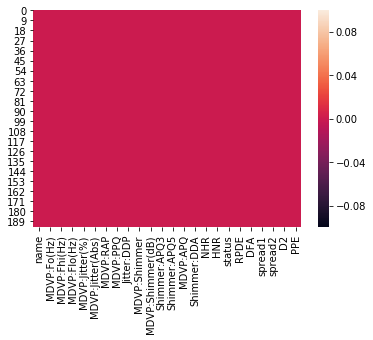

In [4]:
sns.heatmap(pd_df.isnull())

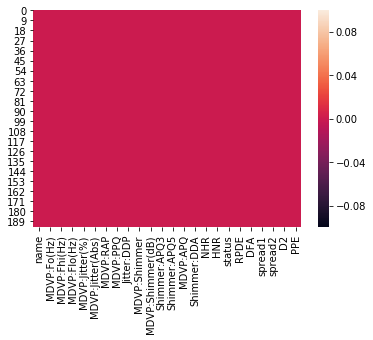

In [5]:
sns.heatmap(pd_df.isna())

<h3>
<br>
3. Using univariate &amp; bivariate analysis to check the individual attributes <br>
for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)<br>
<br>
</h3>

In [80]:
## Univariate Analysis
## -------------------

## p-value for shapiro test of each of the columns except name column has value > 0.05 which indicate these columns
## (datapoints) are normally distributed

## Kurtosis
## --------
## High Kurtosis value (>5) of below columns indicates the presence of outliers in normal distribution. Boxplot
## of the below column values indicate many outliers (Please find the plots below)

## MDVP:Fhi(Hz) has min of 102 and max value of 592. Max value is outside (std. Dev+3*91) - 197+3*91
## MDVP:Jitter(%) 
## MDVP:Jitter(Abs)
## MDVP:RAP  
## MDVP:PPQ 
## Jitter:DDP
## MDVP:Shimmer(dB)
## MDVP:APQ
## NHR

In [23]:
pd_df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


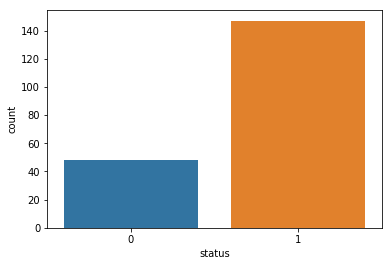

In [27]:
sns.countplot(x='status',data=pd_df)

In [55]:
pd_df.kurtosis()

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

In [31]:
pd_df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [46]:
for column in pd_df.columns:
    if(column != 'name'):
        print('shapiro test value for ',column,' is ',shapiro(pd_df[column]))

shapiro test value for  MDVP:Fo(Hz)  is  (0.9370529055595398, 1.733860273134269e-07)
shapiro test value for  MDVP:Fhi(Hz)  is  (0.7228380441665649, 9.295729992417817e-18)
shapiro test value for  MDVP:Flo(Hz)  is  (0.8608442544937134, 2.274257821996417e-12)
shapiro test value for  MDVP:Jitter(%)  is  (0.6835368871688843, 6.42779565042054e-19)
shapiro test value for  MDVP:Jitter(Abs)  is  (0.7665051221847534, 2.5663168654872337e-16)
shapiro test value for  MDVP:RAP  is  (0.6478774547576904, 6.996929516069408e-20)
shapiro test value for  MDVP:PPQ  is  (0.6807632446289062, 5.374223459029992e-19)
shapiro test value for  Jitter:DDP  is  (0.6477364897727966, 6.938250098896721e-20)
shapiro test value for  MDVP:Shimmer  is  (0.8360680341720581, 1.4874616837724786e-13)
shapiro test value for  MDVP:Shimmer(dB)  is  (0.8024829626083374, 5.64582230047476e-15)
shapiro test value for  Shimmer:APQ3  is  (0.8466726541519165, 4.604088920008576e-13)
shapiro test value for  Shimmer:APQ5  is  (0.8115590810

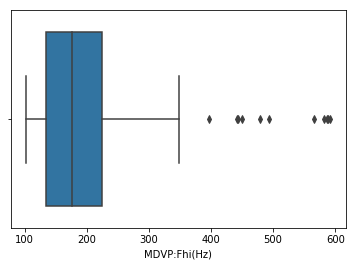

In [62]:
sns.boxplot(pd_df['MDVP:Fhi(Hz)'])

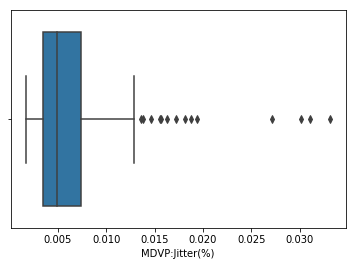

In [66]:
sns.boxplot(pd_df['MDVP:Jitter(%)'])

In [ ]:
## MDVP:Fhi(Hz)
## MDVP:Jitter(%) 
## MDVP:Jitter(Abs)
## MDVP:RAP  
## MDVP:PPQ 
## Jitter:DDP
## MDVP:Shimmer(dB)
## MDVP:APQ
## NHR

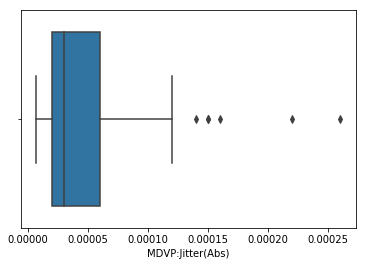

In [67]:
sns.boxplot(pd_df['MDVP:Jitter(Abs)'])

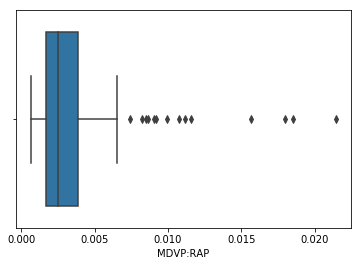

In [68]:
sns.boxplot(pd_df['MDVP:RAP'])

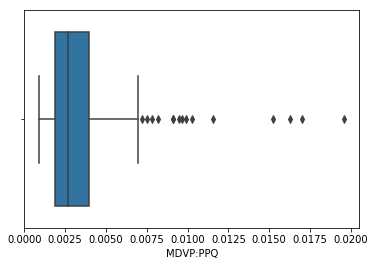

In [69]:
sns.boxplot(pd_df['MDVP:PPQ'])

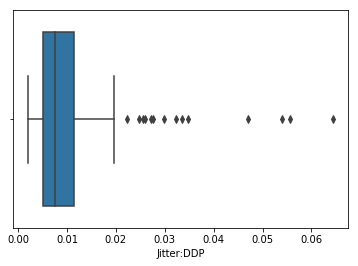

In [70]:
sns.boxplot(pd_df['Jitter:DDP'])

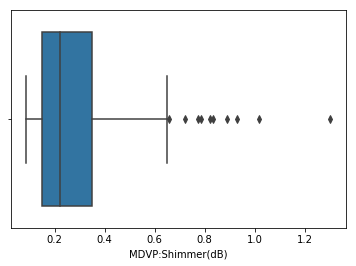

In [71]:
sns.boxplot(pd_df['MDVP:Shimmer(dB)'])

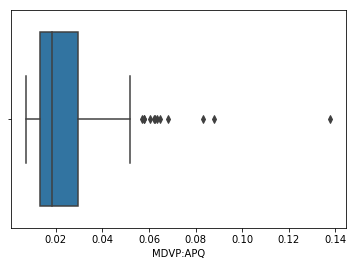

In [72]:
sns.boxplot(pd_df['MDVP:APQ'])

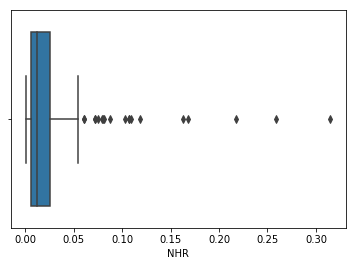

In [74]:
sns.boxplot(pd_df['NHR'])

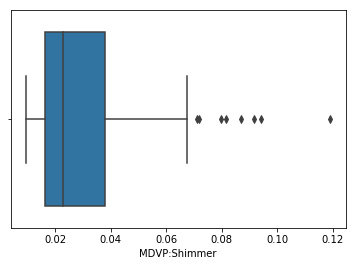

In [76]:
sns.boxplot(pd_df['MDVP:Shimmer'])

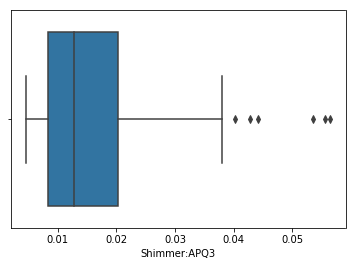

In [77]:
sns.boxplot(pd_df['Shimmer:APQ3'])

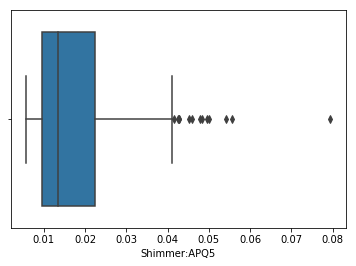

In [78]:
sns.boxplot(pd_df['Shimmer:APQ5'])